# Bootcamp 2

In [1]:
import torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Data setup

### Loading the Data in Training and Validation Sets

In [2]:
train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

validation_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True
)

validation_loader = DataLoader(
    dataset=validation_dataset,
    batch_size=256,
    shuffle=False
)

In [3]:


print("Training images:", train_dataset.data.shape)
print("Training labels: ", train_dataset.targets.shape)

print("Validation images:", validation_dataset.data.shape)
print("Validation labels:", validation_dataset.targets.shape)

Training images: torch.Size([60000, 28, 28])
Training labels:  torch.Size([60000])
Validation images: torch.Size([10000, 28, 28])
Validation labels: torch.Size([10000])


### Displaying the Data

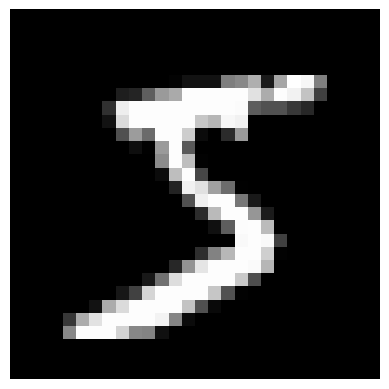

In [4]:
mnist_digit = train_dataset.data[0]
plt.imshow(mnist_digit, cmap='gray')
plt.axis('off')
plt.show()

## Training Setup

### Defining the Model

In [5]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

### Setting the Loss Function and Optimizer

In [6]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=0.1)

## Training the Model

In [7]:
model.train()
number_of_epochs = 3
for epoch in range(number_of_epochs):
    for X, y in train_loader:
        opt.zero_grad()
        y_hat = model(X)
        loss = loss_fn(y_hat, y)
        loss.backward()
        opt.step()
    print(f"Epoch {epoch+1} done")

Epoch 1 done
Epoch 2 done
Epoch 3 done


## Evaluating the Model

### Calculating Accuracy

In [8]:
model.eval()
correct = 0
total   = 0
with torch.no_grad():
    for X, y in validation_loader:
        pred = model(X).argmax(dim=1)
        correct += (pred == y).sum().item()
        total   += y.size(0)
print(f"Validation accuracy: {correct/total:.3f}")

Validation accuracy: 0.971


### Displaying the Results

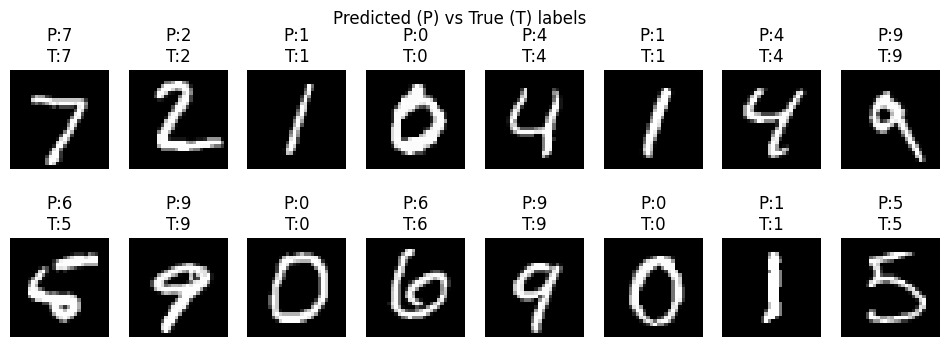

In [9]:
model.eval()
X, y = next(iter(validation_loader))
with torch.no_grad():
    preds = model(X).argmax(dim=1)

plt.figure(figsize=(12, 4))
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(X[i][0], cmap='gray')
    plt.title(f"P:{preds[i].item()}\nT:{y[i].item()}")
    plt.axis('off')
plt.suptitle('Predicted (P) vs True (T) labels')
plt.show()

In [ ]:
Addendum - Intro to ML-ops

Export the model, load it in and prepare it for inference via Python